# Facebook Prophet
Facebook open-sourced its time-series forecasting tool called Prophet in 2017 which produced accurate forecasts as produced by skilled analysts with a minimum amount of human efforts. The Facebook prophet is available in the form of API in Python and R/

### How Facebook Prophet works?

Facebook Prophet using Additive Regressive models using the following four components:

`y(t) = g(t) + s(t) + h(t) + \epsilon_t`

- **g(t):** A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting change points from the data.
- **s(t):** A yearly seasonal component modeled using the Fourier series and weekly seasonal component using dummy variable
- **h(t):** A user-provided list of important holidays.
- **et**:  Error term used by the prophet.

---
### Install required Python modules

In [1]:
!pip install Cython>=0.22
!pip install cmdstanpy==0.4
!pip install numpy>=1.10.0
!pip install pandas>=0.23.4
!pip install matplotlib>=2.0.0
!pip install LunarCalendar>=0.0.9
!pip install convertdate>=2.1.2
!pip install holidays>=0.9.5
!pip install setuptools-git>=1.2
!pip install python-dateutil>=2.8.0
!pip install pytz>=2017.2
!pip install cycler>=0.10
!pip install kiwisolver>=1.0.1
!pip install pyparsing!=2.0.4
!pip install ephem>=3.7.5.3
!pip install pymeeus
!pip install six
!pip install yfinance

# As of v1.0, the package name on PyPI is “prophet”; prior to v1.0 it was “fbprophet”.
!pip uninstall prophet
!pip install pystan==2.19.1.1
!pip install prophet
##!pip install fbprophet

  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.2.4
    Uninstalling cmdstanpy-1.2.4:
      Successfully uninstalled cmdstanpy-1.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.5 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.4.0 which is incompatible.
Found existing installation: prophet 1.1.5
Uninstalling prophet-1.1.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/prophet-1.1.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/prophet.libs/libtbb-900b4965.so.2
    /usr/local/lib/python3.10/dist-packages/prophet.libs/libtbbmalloc-8b5a541b.so.2
    /usr/local/lib/python3.10/dist-packages/prophet/*
Proceed (Y/n)? y
  Successfully uninstalled prophet-1.1.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 66.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel

---
### Import required Python modules

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet as fbp
import yfinance as yahooFinance
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

# Test proper installation of Facebook Prophet: https://facebook.github.io/prophet/docs/installation.html
print(f"Facebook Prophet version: { fbp.__version__ }")

Facebook Prophet version: 1.1.5


---
### Load dataset

In [18]:
# Here We are getting Facebook financial information
# We need to pass FB as argument for that
facebook_data = yahooFinance.Ticker("META")

# whole python dictionary is printed here
print(f"Facebook 1y data:")
print( facebook_data.history(period="max") )

# Store the values
filtered_data = facebook_data.history( period="10y" )

df = filtered_data

# Index
##print(f"Index: {df.index}")

# Show the df
print(f"Dataframe:")
df.head()

Facebook 1y data:
                                 Open        High         Low       Close  \
Date                                                                        
2012-05-18 00:00:00-04:00   41.963770   44.907721   37.922076   38.151604   
2012-05-21 00:00:00-04:00   36.455086   36.584820   32.932326   33.960213   
2012-05-22 00:00:00-04:00   32.543127   33.521117   30.876552   30.936428   
2012-05-23 00:00:00-04:00   31.305670   32.433352   31.295691   31.934378   
2012-05-24 00:00:00-04:00   32.882431   33.141896   31.704851   32.962265   
...                               ...         ...         ...         ...   
2024-07-23 00:00:00-04:00  489.839996  495.220001  487.720001  488.690002   
2024-07-24 00:00:00-04:00  472.309998  476.299988  460.579987  461.269989   
2024-07-25 00:00:00-04:00  463.260010  463.549988  442.649994  453.410004   
2024-07-26 00:00:00-04:00  464.200012  469.769989  459.420013  465.700012   
2024-07-29 00:00:00-04:00  470.434998  472.649994  465.029

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-07-29 00:00:00-04:00,74.566769,74.766356,73.269432,73.558838,41324000,0.0,0.0
2014-07-30 00:00:00-04:00,74.057818,75.035812,73.977980,74.526855,36853000,0.0,0.0
2014-07-31 00:00:00-04:00,73.848245,74.017894,72.291446,72.501015,43992000,0.0,0.0
2014-08-01 00:00:00-04:00,72.071904,73.069854,71.403280,72.211617,43535000,0.0,0.0
2014-08-04 00:00:00-04:00,72.211610,73.728489,72.211610,73.359253,30777000,0.0,0.0


In [19]:
# add two columnsin dataframe having values as Date and Adj Close
print(f"dataframe:\n{ df }")

# Show `df` keys
print(f"dataframe keys: { df.keys() }")

# add two columnsin dataframe having values as Date and Adj Close
df[['y']] = df[['Close']]

df[ 'ds' ] = df.index

# Convert the 'ds' column to a datetime object without timezone
df[ 'ds' ] = pd.to_datetime(df['ds']).dt.tz_localize(None)

# Subset two columns from data frame
df = df[['ds', 'y']]

df.head()

# Select only `Close` price
#df = df[[ 'Close' ]]

df.head()

dataframe:
                                 Open        High         Low       Close  \
Date                                                                        
2014-07-29 00:00:00-04:00   74.566769   74.766356   73.269432   73.558838   
2014-07-30 00:00:00-04:00   74.057818   75.035812   73.977980   74.526855   
2014-07-31 00:00:00-04:00   73.848245   74.017894   72.291446   72.501015   
2014-08-01 00:00:00-04:00   72.071904   73.069854   71.403280   72.211617   
2014-08-04 00:00:00-04:00   72.211610   73.728489   72.211610   73.359253   
...                               ...         ...         ...         ...   
2024-07-23 00:00:00-04:00  489.839996  495.220001  487.720001  488.690002   
2024-07-24 00:00:00-04:00  472.309998  476.299988  460.579987  461.269989   
2024-07-25 00:00:00-04:00  463.260010  463.549988  442.649994  453.410004   
2024-07-26 00:00:00-04:00  464.200012  469.769989  459.420013  465.700012   
2024-07-29 00:00:00-04:00  470.434998  472.649994  465.029999  46

,ds,y
Date,,
2014-07-29 00:00:00-04:00,2014-07-29,73.558838
2014-07-30 00:00:00-04:00,2014-07-30,74.526855
2014-07-31 00:00:00-04:00,2014-07-31,72.501015
2014-08-01 00:00:00-04:00,2014-08-01,72.211617
2014-08-04 00:00:00-04:00,2014-08-04,73.359253


---
### Dataset splitting: Training and Validation sets

In [62]:
# split data frame  into two parts train and test
split_date = "2019-12-31"

print(f"First element: { df.index[0] }")
print(f"Last element: { df.index[-1] }\n")

df_train = df.loc[ df['ds'] <= split_date].copy()
df_test = df.loc[  df['ds'] > split_date].copy()

print("_" * 80 + "\n")
print(f"Train data:\n{ df_train }")
print("_" * 80 + "\n")
print(f"Test data:\n{ df_test }")

First element: 2014-07-29 00:00:00-04:00
Last element: 2024-07-29 00:00:00-04:00

________________________________________________________________________________

Train data:
                                  ds           y
Date                                            
2014-07-29 00:00:00-04:00 2014-07-29   73.558838
2014-07-30 00:00:00-04:00 2014-07-30   74.526855
2014-07-31 00:00:00-04:00 2014-07-31   72.501015
2014-08-01 00:00:00-04:00 2014-08-01   72.211617
2014-08-04 00:00:00-04:00 2014-08-04   73.359253
...                              ...         ...
2019-12-24 00:00:00-05:00 2019-12-24  204.699341
2019-12-26 00:00:00-05:00 2019-12-26  207.363876
2019-12-27 00:00:00-05:00 2019-12-27  207.673264
2019-12-30 00:00:00-05:00 2019-12-30  203.990829
2019-12-31 00:00:00-05:00 2019-12-31  204.829086

[1367 rows x 2 columns]
________________________________________________________________________________

Test data:
                                  ds           y
Date                

---
### Model: Train

In [63]:
# Instantiate Prophet
model = fbp.Prophet()

# Train the model
model.fit( df_train )

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzazezy3/lr1r5_wv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzazezy3/r33d2i8w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80315', 'data', 'file=/tmp/tmpdzazezy3/lr1r5_wv.json', 'init=/tmp/tmpdzazezy3/r33d2i8w.json', 'output', 'file=/tmp/tmpdzazezy3/prophet_modelpj5bywby/prophet_model-20240729160258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:02:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:02:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


---
### Forecast

In [64]:
forecast = model.predict(df_test)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1145,2024-07-23,441.866758,122.768693,793.592369,115.332398,783.351916,10.208221,10.208221,10.208221,0.346131,0.346131,0.346131,9.862090,9.862090,9.862090,0.0,0.0,0.0,452.074979
1146,2024-07-24,442.008606,124.520102,790.464457,115.232083,783.809765,9.965878,9.965878,9.965878,0.370835,0.370835,0.370835,9.595043,9.595043,9.595043,0.0,0.0,0.0,451.974484
1147,2024-07-25,442.150454,122.835686,790.611223,115.131768,784.267614,9.632599,9.632599,9.632599,0.346230,0.346230,0.346230,9.286369,9.286369,9.286369,0.0,0.0,0.0,451.783053
1148,2024-07-26,442.292301,123.804876,791.883231,115.031454,784.725463,9.246742,9.246742,9.246742,0.307862,0.307862,0.307862,8.938879,8.938879,8.938879,0.0,0.0,0.0,451.539043
1149,2024-07-29,442.717845,122.173151,791.102374,115.214834,785.467008,7.879353,7.879353,7.879353,0.180103,0.180103,0.180103,7.699251,7.699251,7.699251,0.0,0.0,0.0,450.597198


---
### Visualize results

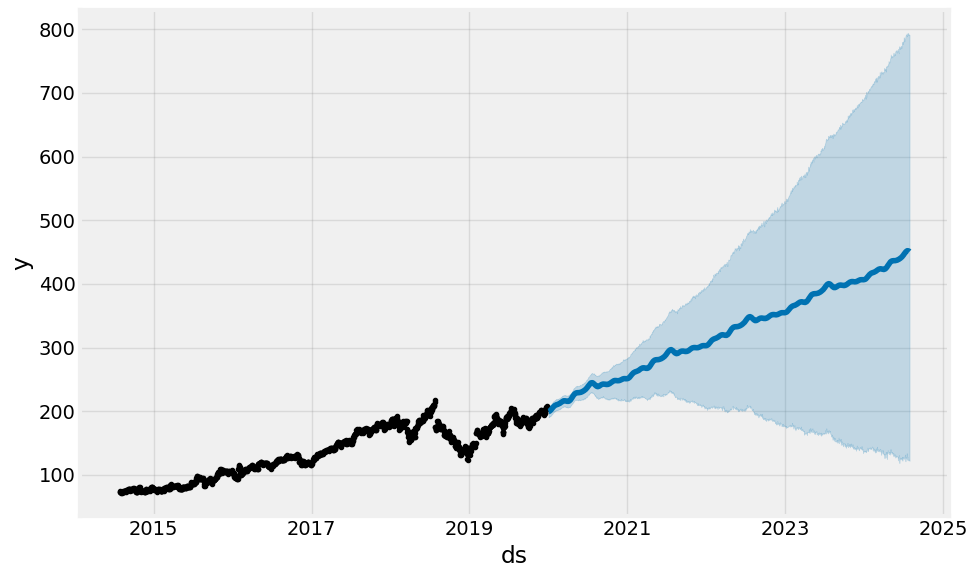

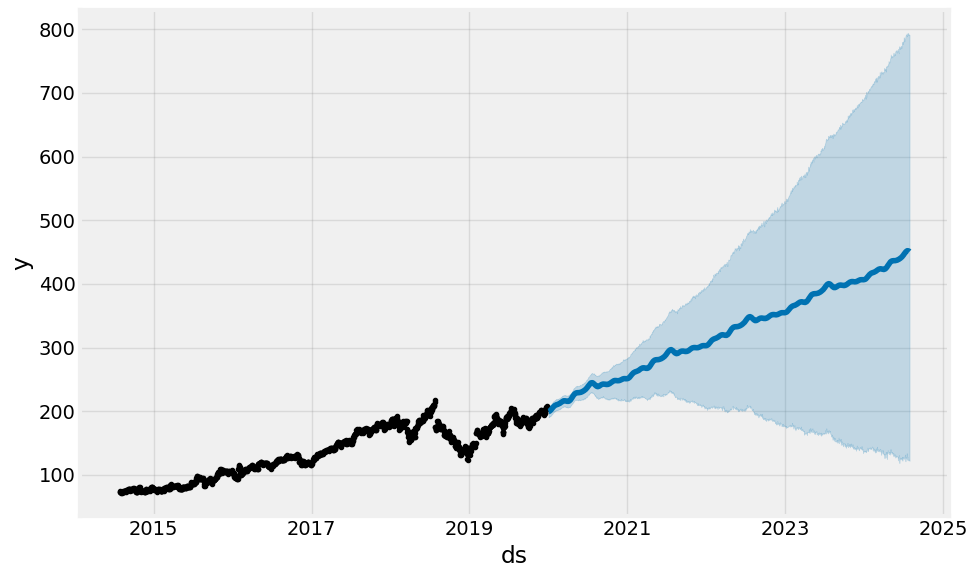

In [65]:
# Plot the data
model.plot(forecast)

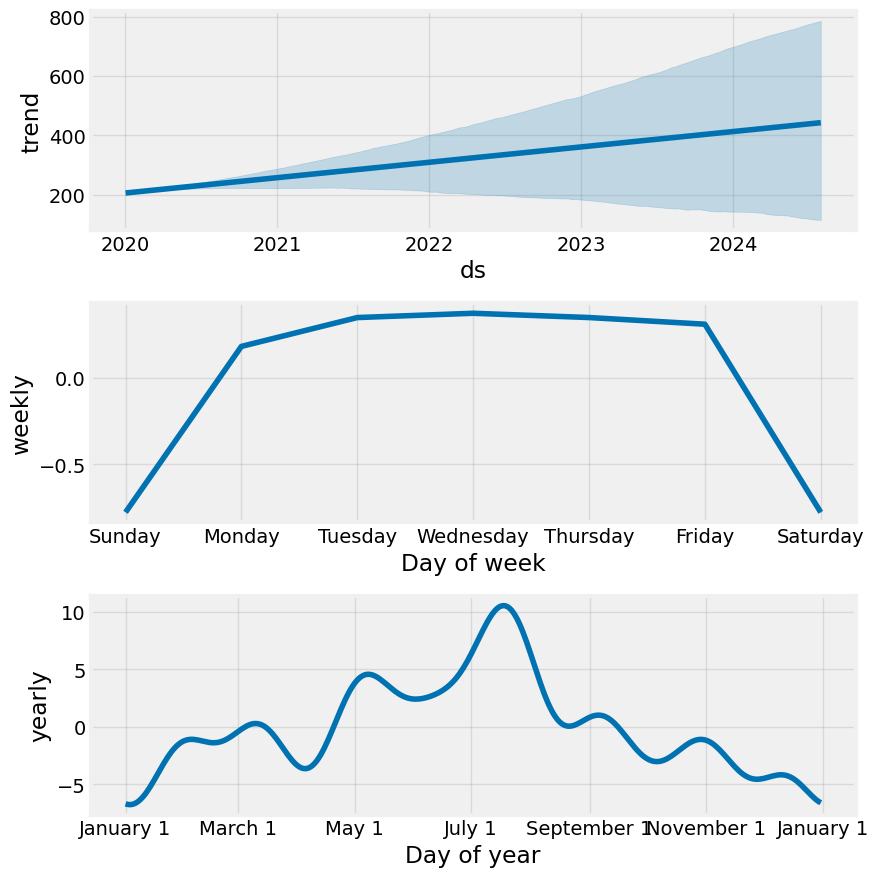

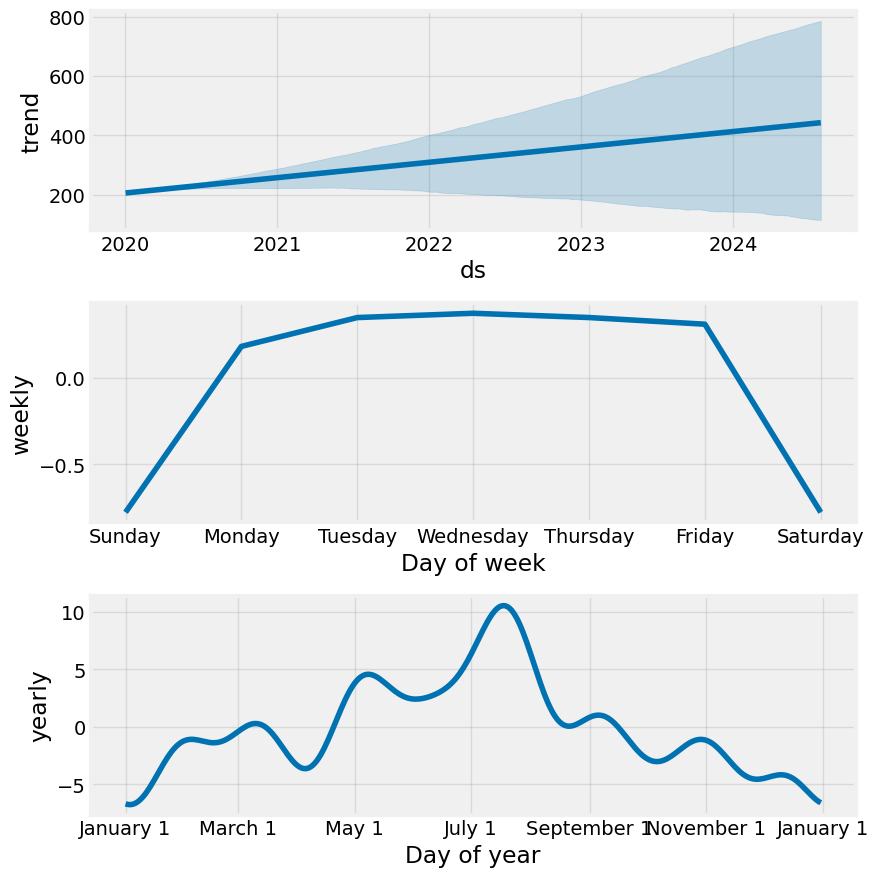

In [66]:
# Plot seasonality trends
model.plot_components( forecast )

---
### Model evaluation

In [67]:
# code
print( "Mean Squared  Error (MSE):",  round( mean_squared_error(  y_true = df_test["y"], y_pred = forecast['yhat'] ), 2 ) )
print( "Mean Absolute Error (MAE):", round( mean_absolute_error( y_true = df_test["y"], y_pred = forecast['yhat'] ), 2 ) )

Mean Squared  Error (MSE): 11360.85
Mean Absolute Error (MAE): 81.66
